In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator


C:\Users\Pravallika\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Pravallika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


In [3]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
   r"C:\Users\Pravallika\mini project code\train\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 31571 images belonging to 4 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
   r"C:\Users\Pravallika\mini project code\val\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 6765 images belonging to 4 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Pravallika\mini project code\test\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 6768 images belonging to 4 classes.


In [7]:
# Define DenseNet-201 model
base_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)


In [9]:
base_model.trainable = False


In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])


In [10]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [11]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20
987/987 [==============================] - 2867s 3s/step - loss: 0.4062 - accuracy: 0.8528 - val_loss: 0.2859 - val_accuracy: 0.9039
Epoch 2/20
987/987 [==============================] - 3039s 3s/step - loss: 0.2532 - accuracy: 0.9129 - val_loss: 0.2269 - val_accuracy: 0.9255
Epoch 3/20
987/987 [==============================] - 3154s 3s/step - loss: 0.2183 - accuracy: 0.9222 - val_loss: 0.1961 - val_accuracy: 0.9350
Epoch 4/20
987/987 [==============================] - 2890s 3s/step - loss: 0.1990 - accuracy: 0.9294 - val_loss: 0.1855 - val_accuracy: 0.9395
Epoch 5/20
987/987 [==============================] - 2785s 3s/step - loss: 0.1860 - accuracy: 0.9335 - val_loss: 0.1832 - val_accuracy: 0.9391
Epoch 6/20
987/987 [==============================] - 2806s 3s/step - loss: 0.1770 - accuracy: 0.9379 - val_loss: 0.1644 - val_accuracy: 0.9468
Epoch 7/20
987/987 [==============================] - 2809s 3s/step - loss: 0.1734 - accuracy: 0.9374 - val_loss: 0.1614 - val_accuracy:

In [12]:
# Save the trained model
import os
model.save(os.path.join(r"C:\Users\Pravallika\mini project code", "pravallika.h5"))
print("Model saved successfully.")


C:\Users\Pravallika\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [8]:
# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\Pravallika\mini project code\pravallika.h5")

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

212/212 [==============================] - 554s 3s/step - loss: 0.1489 - accuracy: 0.9444
Test Loss: 0.14894583821296692
Test Accuracy: 0.9444444179534912


In [15]:
# Calculate metrics
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

accuracy = Accuracy()
precision = Precision()
recall = Recall()

accuracy.update_state(y_true, y_pred)
precision.update_state(y_true, y_pred)
recall.update_state(y_true, y_pred)

print("Performance Metrics:")
print("Accuracy:", accuracy.result().numpy())
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())

212/212 [==============================] - 549s 3s/step
Performance Metrics:
Accuracy: 0.9444444
Precision: 0.97814757
Recall: 0.9866532


1/1 [==============================] - 0s 301ms/step


IndexError: index 2 is out of bounds for axis 0 with size 1

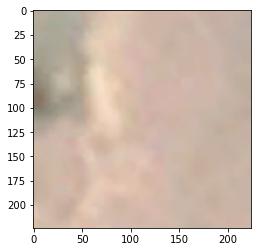

In [10]:
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import matplotlib.pyplot as plt
def predict_terrain(model, img_path):
    img = keras_image.load_img(img_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it (1, 224, 224, 3)
    img_array /= 255.0 

    # Predict the terrain type
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    plt.imshow(img)
    plt.title(f'Predicted: {list(train_generator.class_indices.keys())[predicted_class[2]]}')
    plt.axis('off')
    plt.show()

# To use this function, pass the path to an image file
predict_terrain(model, r"C:\Users\Pravallika\mini project code\test\test\Sandy\Sandy (1)_0_17.png")
